# Arizona State University - Dual Channel Readout Notebook
```Version 1.0.0```

```Author(s): Cody Roberson```

In [1]:
import kidpy3 as kp3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rfsoc1 = kp3.RFSOC("192.168.2.10", rfsoc_name="rfsoc1")
rfsoc2 = kp3.RFSOC("192.168.2.10", rfsoc_name="rfsoc2") 

In [4]:
rfsoc1.upload_bitstream("last_horizon_20231203-0038.bit")

2024-06-13 17:33:29,741|INFO|rfsoc.py|102|issue_command| Command Success
2024-06-13 17:33:29,742|INFO|rfsoc.py|145|upload_bitstream| upload_bitstream success


In [5]:
rfsoc1.config_hardware("192.168.3.50", "192.168.3.51", "E8EA6A033BE8")

2024-06-13 17:33:29,764|INFO|rfsoc.py|102|issue_command| Command Success
2024-06-13 17:33:29,765|INFO|rfsoc.py|173|config_hardware| config_hardware success


In [6]:
freqs_up = -1.0*np.linspace(251.0e6,1.0e6,500)
freqs_lw = 1.0*np.linspace(2.25e6,252.25e6,500)
freqs = np.append(freqs_up,freqs_lw)
rfsoc1.set_tone_list(1, freqs, np.ones(1000))

2024-06-13 17:33:31,381|INFO|rfsoc.py|102|issue_command| Command Success


In [7]:
valon = kp3.ifslice.Synthesizer("/dev/IFSLICE")

Checking for baud 115200
Checking for baud 9600
Connected at baud 9600


In [8]:
atten = kp3.ifslice.IfSliceAtten()
atten.connect()

Found the device


In [9]:
atten.set_atten(1, 0.0) # RF OUT

True

In [10]:
atten.set_atten(2, 5) # RF IN

True

In [11]:
from kidpy3.measurements import *

In [12]:
from kidpy3.udp2 import udpcap

<div class='alert alert-info'>Quick and Dirty backend for grabbing data for the purposes of sweeps</div>

In [13]:
udp = udpcap()

192.168.3.40
4096


In [14]:
loSweep(valon, udp, freqs, f_center=3550, N_steps = 500, freq_step=0.001,savefile="s21")

2024-06-13 17:33:33,650|INFO|measurements.py|37|sweep| tone diff=0.501002004008025
2024-06-13 17:33:33,650|INFO|measurements.py|43|sweep| lo step size=0.001
2024-06-13 17:33:33,651|INFO|measurements.py|49|sweep| len flos (500,)


b'F 3549.75 MHz; // Act 3549.75 MHz\r\n'
.b'F 3549.751 MHz; // Act 3549.750914 MHz\r\n'
.b'F 3549.752 MHz; // Act 3549.752 MHz\r\n'
.b'F 3549.753 MHz; // Act 3549.753356 MHz\r\n'
.b'F 3549.754 MHz; // Act 3549.753356 MHz\r\n'
.b'F 3549.755 MHz; // Act 3549.755 MHz\r\n'
.b'F 3549.756 MHz; // Act 3549.756 MHz\r\n'
.b'F 3549.757 MHz; // Act 3549.755798 MHz\r\n'
.b'F 3549.758 MHz; // Act 3549.75824 MHz\r\n'
.b'F 3549.759 MHz; // Act 3549.75824 MHz\r\n'
.b'F 3549.76 MHz; // Act 3549.76 MHz\r\n'
.b'F 3549.761 MHz; // Act 3549.760682 MHz\r\n'
.b'F 3549.762 MHz; // Act 3549.763124 MHz\r\n'
.b'F 3549.763 MHz; // Act 3549.763124 MHz\r\n'
.b'F 3549.764 MHz; // Act 3549.764 MHz\r\n'
.b'F 3549.765 MHz; // Act 3549.765 MHz\r\n'
.b'F 3549.766 MHz; // Act 3549.765566 MHz\r\n'
.b'F 3549.767 MHz; // Act 3549.768008 MHz\r\n'
.b'F 3549.768 MHz; // Act 3549.768 MHz\r\n'
.b'F 3549.769 MHz; // Act 3549.768008 MHz\r\n'
.b'F 3549.77 MHz; // Act 3549.77 MHz\r\n'
.b'F 3549.771 MHz; // Act 3549.77045 MHz\r\n'
.b'

2024-06-13 17:36:21,155|INFO|measurements.py|83|sweep| sweepz.shape=(500, 1000)


.b'F 3550 MHz; // Act 3550 MHz\r\n'
LO Sweep s21 file saved.


In [15]:
data = np.load("s21.npy")

In [16]:
flos = data[0]
z = data[1]

/home/asu/pybase/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/asu/pybase/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


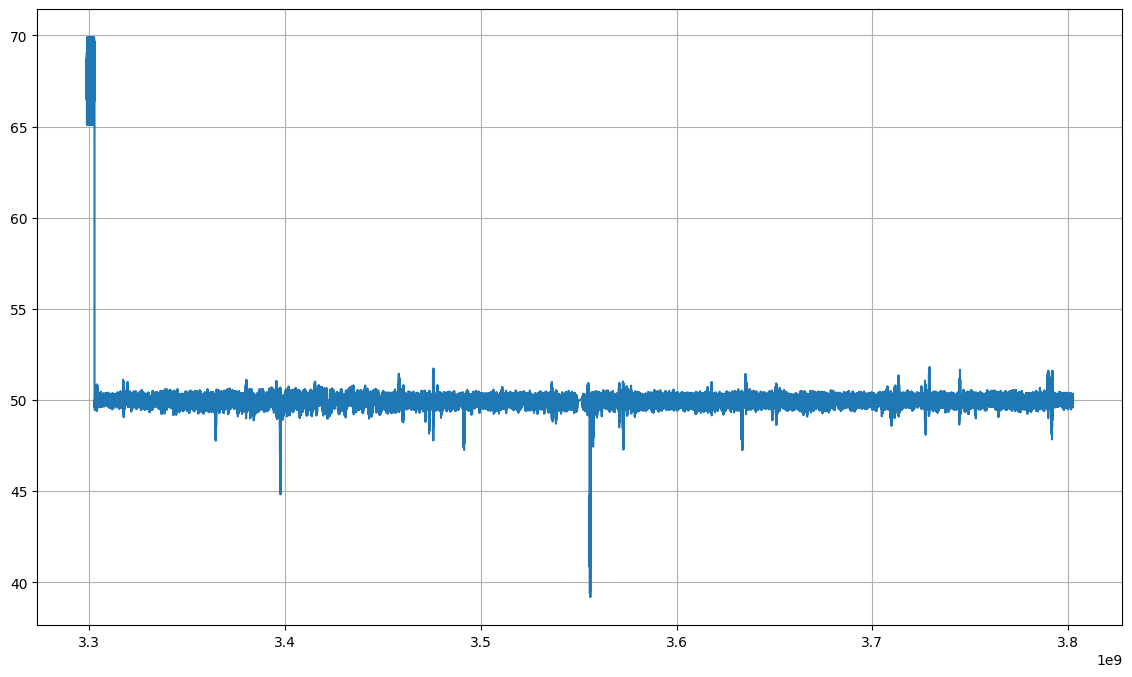

In [17]:
z = 10 * np.log10(np.abs(z))
plt.figure(figsize=(14, 8))
plt.plot(flos, z.real)
plt.grid()
plt.show()